<h2 style="color: green;">Image Augmentation - 색조</h2>

색조(Hue)는 색상의 질적인 측면을 나타내는 색상 속성 중 하나입니다. OpenCV를 사용하여 이미지의 색조를 변경하려면, 이미지를 HSV(Hue, Saturation, Value) 색공간으로 변환한 후, 원하는 색조 값으로 변경하고, 다시 BGR 색공간으로 변환하면 됩니다.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

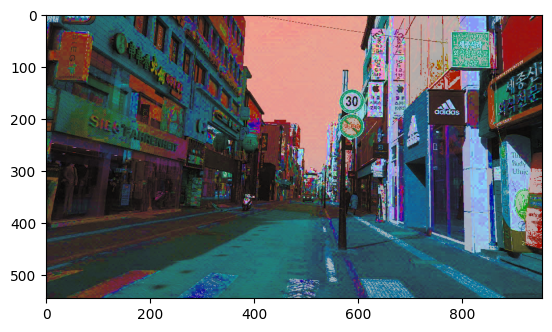

In [6]:
image = cv2.imread("../data/image02.jpeg")
hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

#hsv[h, w, c]
hsv_img[..., 0] = (hsv_img[..., 0] + 30) % 180  #30도 색조 변경
#hsv_img[..., 0]는 HSV 이미지의 모든 행과 열에 대해 0번 인덱스 색조(Hue) 채널을 선택한다는 의미

hsv_img[:, :, 0] += 50  #색조 변경 Hue -> 50도 증가
hsv_img[:, :, 1] = np.uint8(hsv_img[:, :, 1] * 0.5)  #채도 채널 조정
hsv_img[:, :, 1] = np.uint8(hsv_img[:, :, 2] * 1.5) #밝기 채널 조정

#imshow <- BFR/RGB로 강제로 디코딩
rgb_img = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2RGB)
plt.imshow(rgb_img)
plt.show()

<h2 style="color: green;">Image Augmentation - 색온도</h2>

색상 보정(Color correction)은 촬영한 이미지나 동영상의 색상을 보정하여 실제 색상과 더 가깝게 만드는 작업을 말합니다. 이를 통해 이미지나 동영상의 품질을 향상시킬 수 있습니다.

색상 보정에는 여러가지 방법이 있지만, 가장 일반적인 방법은 색온도(Color Temperature)를 조절하는 것입니다. 색온도란 빛의 색깔을 나타내는 단위로, 저온의 빛일수록 붉은색에 가깝고 고온의 빛일수록 푸른색에 가까워집니다. 촬영된 이미지나 동영상에서 빛의 색온도를 바꾸는 것으로 색상 보정을 수행할 수 있습니다.

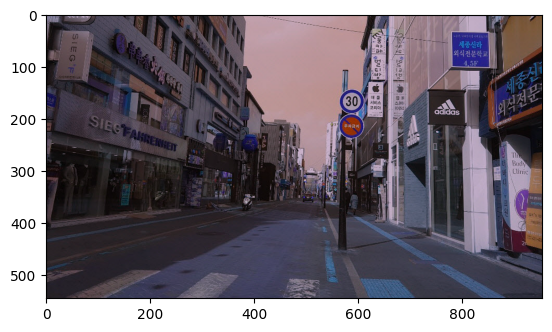

In [10]:
org_img = image.copy()

balance = [0.8, 0.7, 0.8]

for i, value in enumerate(balance) :
    if value != 1.0 :
        org_img[:, :, i] = cv2.addWeighted(org_img[:, :, i], value, 0, 0, 0)
        #addWeighted: src에 대해 value만큼의 가중치로 색온도 조절
        
plt.imshow(org_img)
plt.show()

<h2 style="color: green;">Image Augmentation - 블러링</h2>

블러링(blurring)은 이미지의 일부 또는 전체를 흐리게 만들어 선명도를 감소시키는 작업입니다. 주로 이미지에 있는 노이즈를 제거하거나, 이미지의 세부 사항을 감소시켜 물체를 감지하는 데 도움을 줍니다.

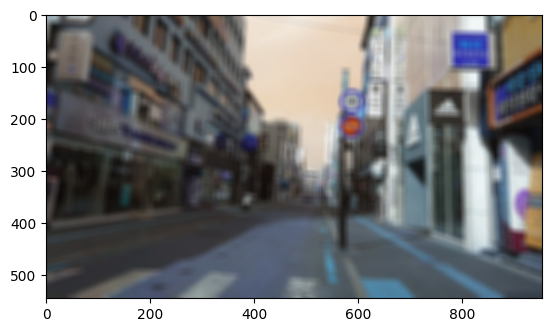

In [25]:
blur_img = cv2.GaussianBlur(image, (15,15),15)
"""
(15, 15): 커널 크기를 나타내는 튜플입니다. 가우시안 커널의 크기를 결정합니다. 
이 경우 (15, 15) 크기의 커널을 사용합니다. 
커널의 크기가 클수록 더 많은 픽셀을 고려하여 부드러운 효과를 얻을 수 있습니다.
15: X축 및 Y축 방향으로의 표준 편차를 나타내는 값입니다. 이 값이 커질수록 블러링 효과가 강해집니다. 즉, 픽셀 주변의 값들이 더 많이 혼합되어 부드러운 이미지가 생성됩니다.
"""
plt.imshow(blur_img)
plt.show()

<h2 style="color: green;">Image Augmentation - 모션 블러링</h2>

모션 블러(Motion blur)는 카메라가 움직일 때 또는 물체가 움직일 때 발생하는 흔한 이미지 효과 중 하나입니다. 모션 블러는 이미지의 일부분이 불안정하게 흔들리는 것처럼 보이게 하여, 이미지에 동적인 효과를 부여하는 데 사용됩니다.

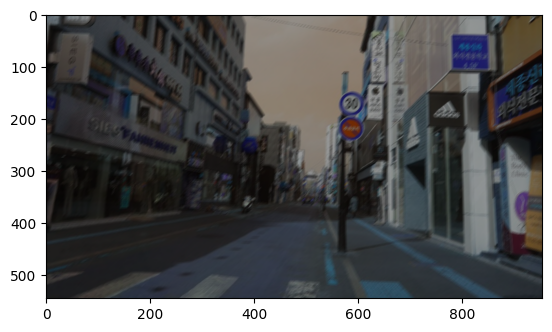

In [28]:
kernel_size = 15
kernel_direction = np.zeros((kernel_size, kernel_size))
kernel_direction[int(kernel_size)//2, :] = np.ones(kernel_size)
#커널 가운데 행만 필터값을 적용해서 가로 방향으로 블러 처리가 되도록
kernel_direction /= kernel_size  #커널의 합이 1이 되도록
kernel_matrix = cv2.getRotationMatrix2D((kernel_size/2, kernel_size/2), 45, 1)
#회전 중심점은 커널 크기의 중앙으로 설정되고, 회전 각도는 45도로 설정됩니다.

kernel = np.hstack((kernel_matrix[:, :2], [[0], [0]]))

kernel = cv2.warpAffine(kernel_direction, kernel, (kernel_size, kernel_size))

motion_blur_img = cv2.filter2D(image, -1, kernel)
#-1은 깊이

plt.imshow(motion_blur_img)
plt.show()

<h2 style="color: green;">Image Augmentation - 히스토그램 균일화</h2>

히스토그램 균일화(Histogram equalization)는 이미지 처리 기술 중 하나로, 이미지의 히스토그램 분포를 조정하여 명암비를 개선하는 기술입니다. 이미지에서 픽셀의 밝기 값 분포가 넓게 퍼져 있지 않으면, 전체적으로 어두워 보이거나 너무 밝아 보일 수 있습니다. 이러한 문제를 해결하기 위해, 히스토그램 균일화는 이미지의 밝기 값을 균등하게 분포 시켜주는 방식으로 이미지의 명암비를 개선합니다.

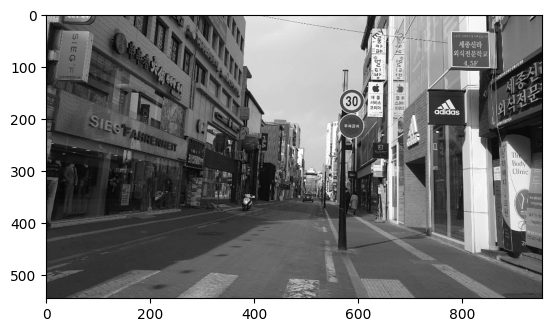

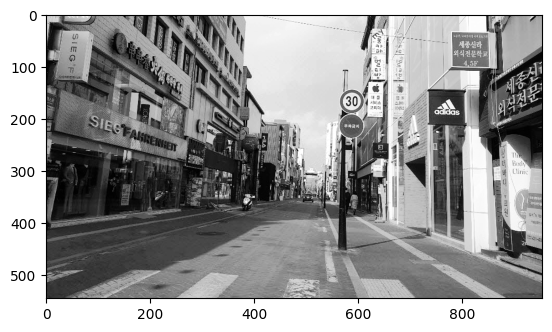

In [11]:
img_gray = cv2.imread("../data/image02.jpeg", cv2.IMREAD_GRAYSCALE)

img_squalized = cv2.equalizeHist(img_gray)

#원본 이미지
plt.imshow(img_gray, 'gray')
plt.show()

#노이즈 제거
plt.imshow(img_squalized, 'gray')
plt.show()